In [54]:
import mne
import matplotlib.pyplot as plt 
fname = "oddball_example_small-fif.gz"
raw = mne.io.read_raw_fif(fname,preload=True)

In [7]:
raw.filter(1,20)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 331 samples (3.310 sec)



<Raw | oddball_example_small-fif.gz, 64 x 109098 (1091.0 s), ~53.4 MB, data loaded>

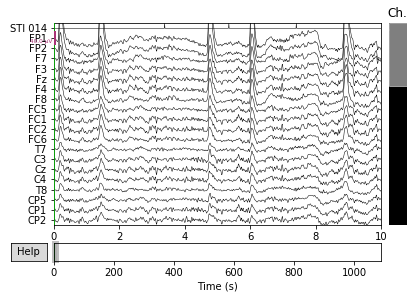

In [9]:
raw.plot();

In [11]:
ica = mne.preprocessing.ICA(n_components=20,random_state=0)
ica

<ICA  |  no decomposition, fit (fastica):  samples, no dimension reduction>

In [12]:
ica.fit(raw.copy().filter(8,35))

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 165 samples (1.650 sec)

Fitting ICA to data using 63 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by number: 20 components
Fitting ICA took 16.1s.


<ICA  |  raw data decomposition, fit (fastica): 109098 samples, 20 components, channels used: "eeg">

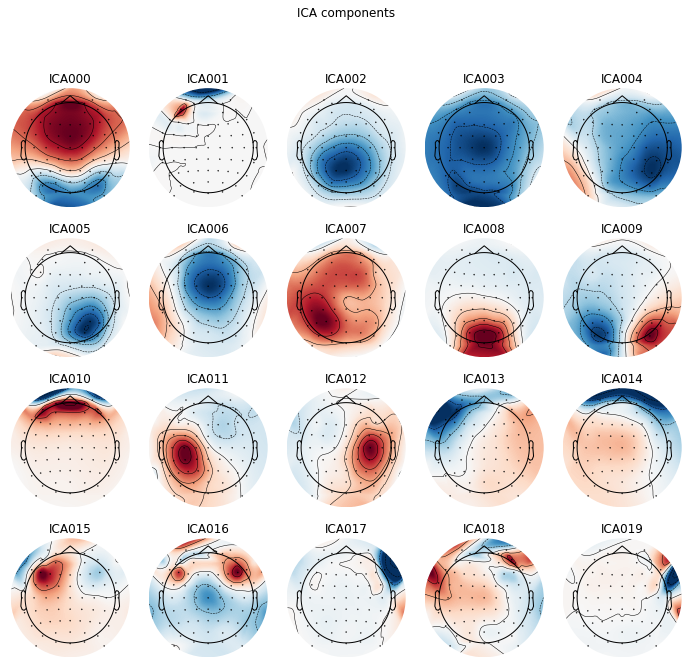

In [16]:
ica.plot_components(outlines="skirt");

In [17]:
ica.exclude= [1,10,14,17,18,19]

In [43]:
bad_idx,scores = ica.find_bads_eog(raw, 'SO2',threshold=2)
print(bad_idx)


Using channel SO2 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1024 samples (10.240 sec)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 

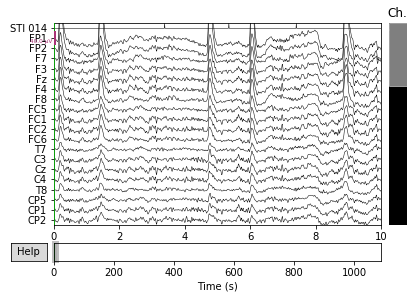

In [45]:
raw.plot();


Transforming to ICA space (20 components)
Zeroing out 6 ICA components


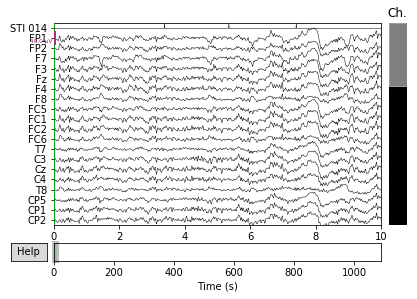

In [46]:
ica.apply(raw.copy(),exclude=ica.exclude).plot();

In [47]:
events = mne.find_events(raw)


903 events found
Event IDs: [100 200]


array([[  3241,      0,    200],
       [  3437,      0,    200],
       [  3643,      0,    200],
       ...,
       [111496,      0,    200],
       [111613,      0,    200],
       [111719,      0,    200]])

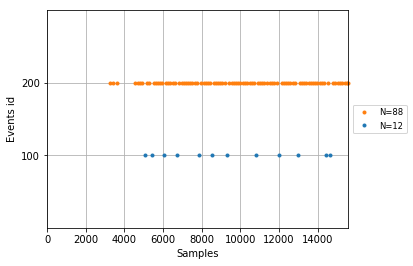

In [51]:
mne.viz.plot_events(events[:100]);

In [52]:
event_ids = {"standard/stimulus": 200, "target/stimulus": 100}
epochs = mne.Epochs(raw,events, event_id=event_ids)

903 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


Loading data for 903 events and 71 original time points ...
0 bad epochs dropped
Loading data for 903 events and 71 original time points ...
Loading data for 20 events and 71 original time points ...


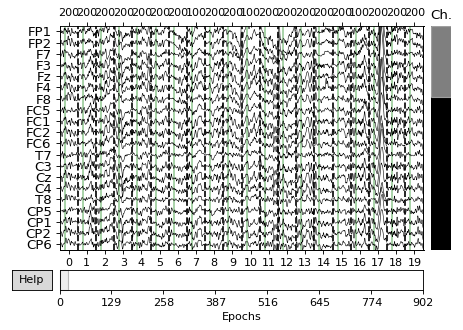

In [53]:
epochs.plot();

In [55]:
%matplotlib inline

In [57]:
epochs = mne.Epochs(raw,events,event_id=event_ids,preload=True)
epochs = ica.apply(epochs,exclude=ica.exclude)

903 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 903 events and 71 original time points ...
0 bad epochs dropped
Transforming to ICA space (20 components)
Zeroing out 6 ICA components


In [58]:
epochs.apply_baseline((None,0))

Applying baseline correction (mode: mean)


<Epochs  |   903 events (all good), -0.2 - 0.5 sec, baseline [None, 0], ~31.4 MB, data loaded,
 'standard/stimulus': 797
 'target/stimulus': 106>

106 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


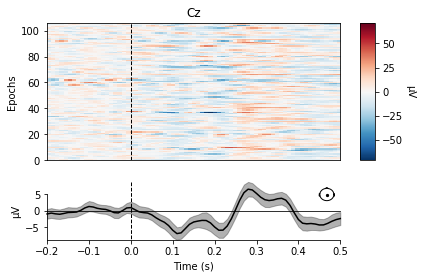

[<Figure size 432x288 with 4 Axes>]

In [66]:

epochs["target"].plot_image(picks=[13])


In [67]:


epochs.equalize_event_counts(event_ids)
epochs



Dropped 691 epochs: 0, 1, 2, 3, 4, 5, 6, 9, 12, 13, 14, 15, 18, 19, 20, 21, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 36, 39, 40, 41, 42, 43, 44, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 69, 70, 71, 72, 73, 74, 75, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 104, 107, 108, 109, 110, 113, 114, 115, 116, 117, 118, 121, 122, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 141, 142, 143, 146, 147, 148, 149, 150, 151, 154, 155, 156, 157, 158, 159, 160, 161, 162, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 187, 188, 193, 194, 197, 198, 199, 200, 201, 202, 203, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 248, 249, 252, 253, 254, 257, 260, 261, 262, 263, 266, 267, 268, 269, 270, 271, 274, 275, 276, 277, 278, 279, 280,

<Epochs  |   212 events (all good), -0.2 - 0.5 sec, baseline [None, 0], ~7.5 MB, data loaded,
 'standard/stimulus': 106
 'target/stimulus': 106>

In [68]:
epochs.save("oddball-epo.fif") 

In [73]:
epochs_for_tfr =  mne.Epochs(raw,events,event_id=event_ids,tmin=-.5,tmax=1.5,preload=True)
epochs_for_tfr = ica.apply(epochs_for_tfr,exclude=ica.exclude)
epochs_for_tfr.equalize_event_counts(event_ids);  # to speed up things
epochs_for_tfr.save("oddball-long-epo.fif")

903 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 903 events and 201 original time points ...
0 bad epochs dropped
Transforming to ICA space (20 components)
Zeroing out 6 ICA components
Dropped 691 epochs: 0, 1, 2, 3, 4, 5, 6, 9, 12, 13, 14, 15, 18, 19, 20, 21, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 36, 39, 40, 41, 42, 43, 44, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 69, 70, 71, 72, 73, 74, 75, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 104, 107, 108, 109, 110, 113, 114, 115, 116, 117, 118, 121, 122, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 141, 142, 143, 146, 147, 148, 149, 150, 151, 154, 155, 156, 157, 158, 159, 160, 161, 162, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 187, 188, 193, 194, 197, 198, 199, 200, 201, 202, 203, 206, 207, 208, 209, 210, 211, 212

In [77]:
fname = "oddball-epo.fif"
epochs = mne.read_epochs(fname)
epochs

Reading oddball-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -200.00 ...     500.00 ms
        0 CTF compensation matrices available
212 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


<EpochsFIF  |   212 events (all good), -0.2 - 0.5 sec, baseline [-0.2, 0], ~7.5 MB, data loaded,
 'standard/stimulus': 106
 'target/stimulus': 106>

In [79]:
target = epochs["target"].average()
standard = epochs["standard"].average()
standard

<Evoked  |  'standard/stimulus' (average, N=106), [-0.2, 0.5] sec, 63 ch, ~169 kB>

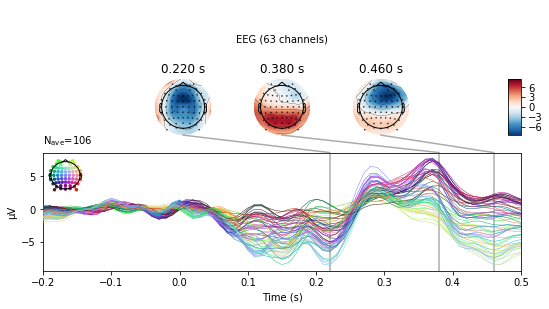

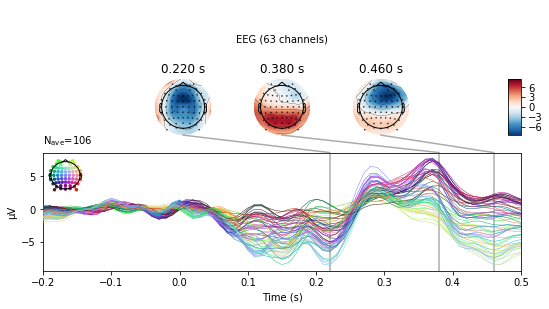

In [86]:
target.plot_joint()
#standard.plot_joint()

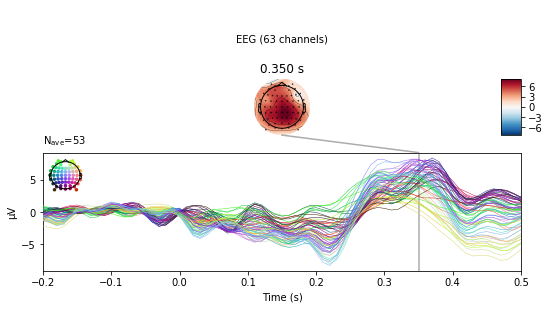

In [89]:
diff = mne.combine_evoked((target, -standard), weights='equal')
diff.plot_joint(times=.35);

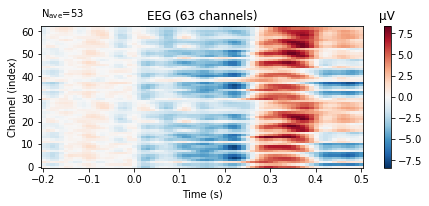

In [90]:
diff.plot_image();

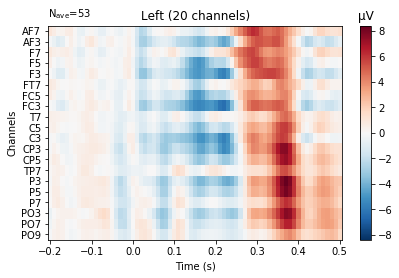

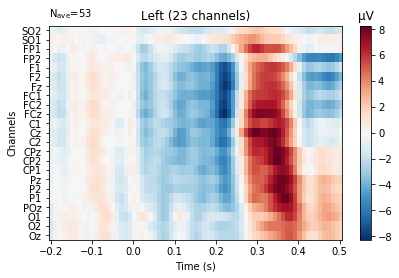

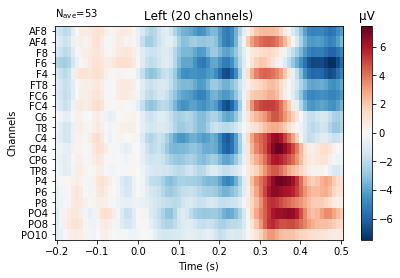

In [91]:
rois = mne.channels.make_1020_channel_selections(diff.info, midline="z12")
diff.plot_image(group_by=rois, show=False, show_names="all");

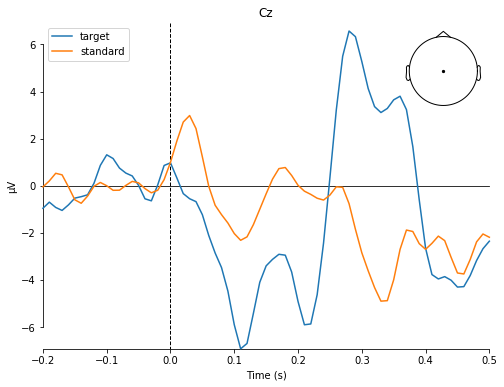

In [92]:
mne.viz.plot_compare_evokeds({"standard": standard,
                              "target": target}, picks=[13]);

In [93]:


epochs_for_tfr = mne.read_epochs("oddball-long-epo.fif")



Reading oddball-long-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
212 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows


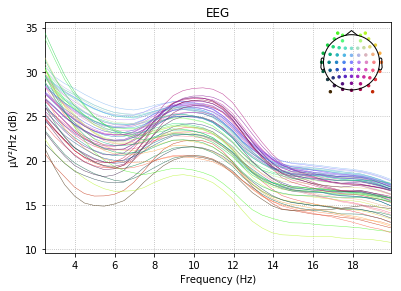

In [94]:
epochs_for_tfr.plot_psd(fmin=2, fmax=20);

In [95]:
from mne.time_frequency import tfr_morlet


In [97]:
freqs = list(range(3,30))
tfr_target = tfr_morlet(epochs_for_tfr["target"],freqs,3,return_itc=False)
tfr_standard = tfr_morlet(epochs_for_tfr["standard"],freqs,3,return_itc=False)

In [98]:
tfr_contrast = mne.combine_evoked((tfr_standard, tfr_target), (-.5, .5))
tfr_contrast.apply_baseline((None, 0))


Applying baseline correction (mode: mean)


<AverageTFR  |  time : [-0.500000, 1.500000], freq : [3.000000, 29.000000], nave : 212, channels : 63, ~2.7 MB>

No baseline correction applied
No baseline correction applied


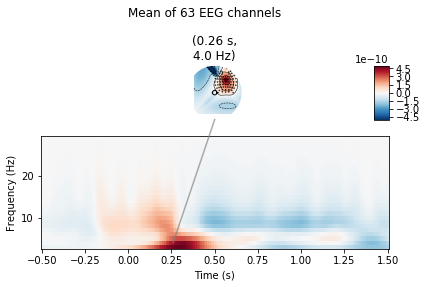

In [99]:
tfr_contrast.plot_joint();

No baseline correction applied


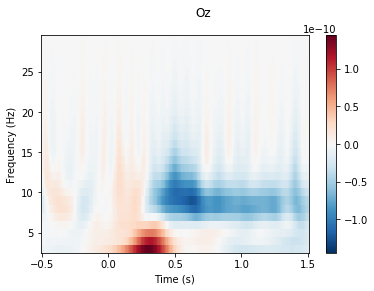

In [100]:
tfr_contrast.plot(picks=[27]);

In [101]:
del epochs_for_tfr

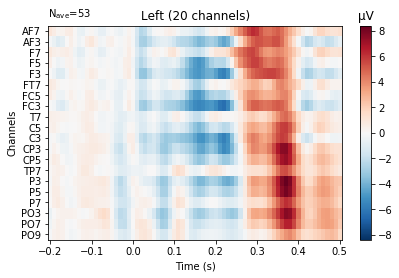

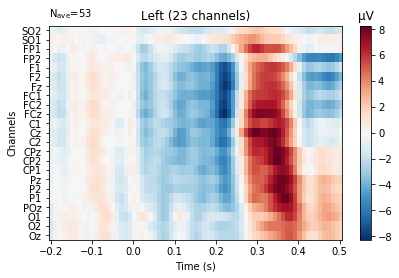

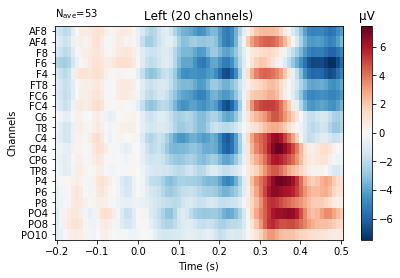

In [102]:
diff.plot_image(group_by=rois, show=False, show_names="all");



Could not find a connectivity matrix for the data. Computing connectivity based on Delaunay triangulations.
-- number of connected vertices : 63


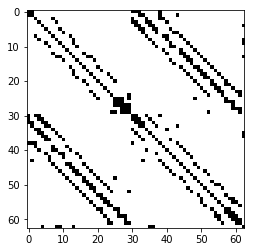

In [103]:
from mne.channels import find_ch_connectivity
connectivity, ch_names = find_ch_connectivity(epochs.info, ch_type='eeg')
plt.imshow(connectivity.toarray(), cmap="Greys")

In [104]:
epochs.pick_types(eeg=True)
target_epochs, standard_epochs = epochs["target"].get_data(), epochs["standard"].get_data()
target_epochs.shape, standard_epochs.shape


((106, 63, 71), (106, 63, 71))

In [105]:
target_epochs = target_epochs.swapaxes(1, 2)
standard_epochs = standard_epochs.swapaxes(1, 2)
target_epochs.shape, standard_epochs.shape

((106, 71, 63), (106, 71, 63))

In [106]:
from mne.stats import spatio_temporal_cluster_test

mne.set_log_level(True)
tfce = dict(start=.2, step=.5)  # decrease both for real analyses
cluster_stats = spatio_temporal_cluster_test([target_epochs, standard_epochs],
                                             threshold=tfce,
                                             n_permutations=200,  # way too low, increase for real analyses
                                             n_jobs=1,  # increase for decent CPUs
                                             connectivity=connectivity)
T_obs, clusters, p_values, _ = cluster_stats

stat_fun(H1): min=0.000000 max=75.314187
Running initial clustering
Using 151 thresholds from 0.20 to 75.20 for TFCE computation (h_power=2.00, e_power=0.50)
Found 4473 clusters
Permuting 199 times...
Computing cluster p-values
Done.


100%|██████████|  : 199/199 [01:01<00:00,    3.24it/s]


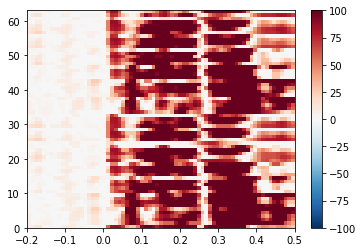

In [107]:
extent = (*epochs.times[[0, -1]], 0, len(epochs.ch_names))
im = plt.imshow(T_obs.T, aspect="auto", cmap="RdBu_r",
                vmin=-100, vmax=100, extent=extent
          )
plt.colorbar(im)

859


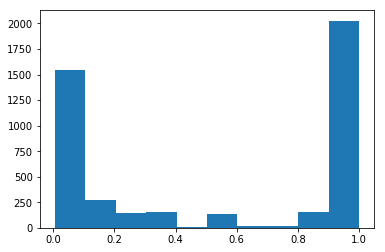

In [108]:
plt.hist(p_values)

alpha = .01
print(sum(p_values < alpha))

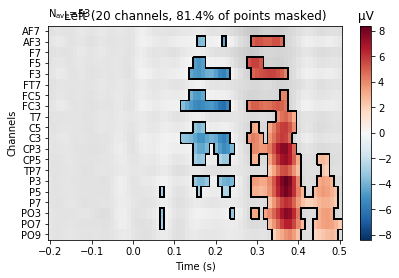

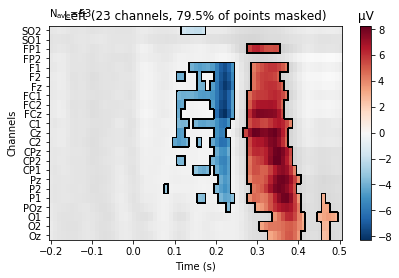

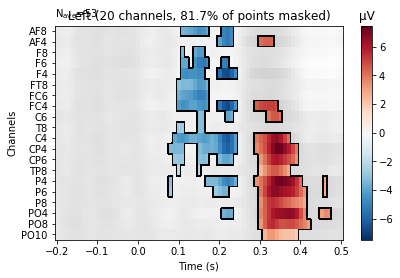

In [109]:
pvals = p_values.reshape(T_obs.shape).T < alpha

diff.plot_image(group_by=rois, show=False, show_names="all", mask=pvals);

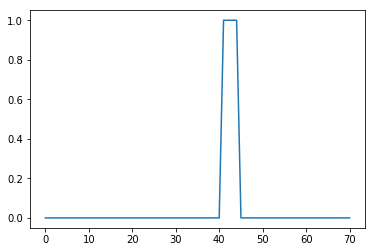

In [110]:
time_mask = (.2 < epochs.times) & (epochs.times < .25)
electrode_pz = epochs.ch_names.index("Cz")
plt.plot(time_mask)

In [111]:


epochs["target"].get_data().shape



(106, 63, 71)

In [112]:
cond_a = epochs["target"].get_data()[:, electrode_pz, time_mask].mean(-1)
cond_b = epochs["standard"].get_data()[:, electrode_pz, time_mask].mean(-1)

In [113]:
cond_a.shape

(106,)

In [114]:
from scipy.stats import ttest_ind, wilcoxon


In [115]:
ttest_ind(cond_a, cond_b)

Ttest_indResult(statistic=-3.185398761411968, pvalue=0.0016656107775993411)

In [116]:
wilcoxon(cond_a, cond_b)

WilcoxonResult(statistic=1726.0, pvalue=0.0004704838864446639)

In [139]:
df = epochs.to_data_frame()
df.head()

,time,condition,epoch,FP1,FP2,F7,F3,Fz,F4,F8,...,P5,P1,P2,P6,PO7,PO3,POz,PO4,PO8,FCz
0,-200,target/stimulus,7,-5.569638,-5.620327,-5.143945,-6.102057,-6.590915,-6.524084,-6.713595,...,-1.433939,-0.818473,-0.597176,2.593392,2.319078,1.453830,3.142563,4.574177,7.175357,-7.466380
1,-190,target/stimulus,7,-4.125365,-4.376233,-5.671656,-6.001161,-4.426533,-4.841483,-6.066758,...,-1.099729,-2.437520,-2.730614,-0.353572,1.928486,0.308712,1.540322,0.741531,3.446719,-4.393988
2,-180,target/stimulus,7,0.644387,0.442166,-2.787724,-0.234391,1.587101,1.352367,-2.675967,...,-0.287896,-1.384971,-1.557908,-2.366775,0.736857,0.386716,1.042359,-1.674911,-1.093497,2.462788
3,-170,target/stimulus,7,4.837009,5.683911,1.896734,6.945924,7.605806,7.687755,1.652572,...,2.275740,3.617918,3.101639,-1.440980,1.881173,3.893145,3.569512,0.222872,-2.681003,8.574202
4,-160,target/stimulus,7,5.234026,7.023589,4.889885,8.439270,8.961994,8.904087,3.517696,...,4.763212,7.378691,6.172418,0.893318,4.513822,7.163631,5.687698,3.577414,-1.161161,9.116045


In [178]:
import pandas
df_cz = df.query("200 < time < 250").groupby(["epoch", "condition"])["Cz"].mean().reset_index()
df_cz.head()


,epoch,condition,Cz
0,7,target/stimulus,3.020595
1,8,standard/stimulus,2.480755
2,10,target/stimulus,-3.826423
3,11,standard/stimulus,3.490718
4,16,target/stimulus,-8.976194


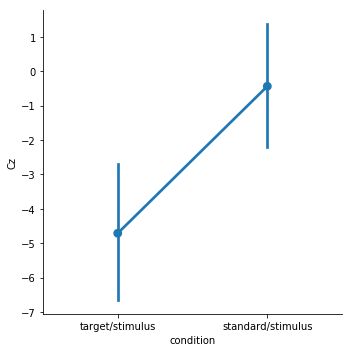

In [180]:
import seaborn as sns
sns.factorplot(y="Cz", data=df_cz, x="condition")

In [181]:
mne.set_log_level(True)

event_ids = {"standard/stimulus": 200, "target/stimulus": 100}

In [182]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [183]:
epochs.pick_types(eeg=True)
X = epochs.get_data()  # features
y = epochs.events[:, -1] == event_ids["target/stimulus"]  # targets
X.shape, y.shape


((212, 63, 71), (212,))

In [184]:
y[:9]


array([ True, False,  True, False,  True, False,  True, False, False])

In [187]:
from mne.decoding import Vectorizer
clf = make_pipeline(Vectorizer(), StandardScaler(),
                    LinearSVC(class_weight="balanced")
                   )

In [188]:
clf.fit(X, y)


Pipeline(memory=None,
         steps=[('vectorizer',
                 <mne.decoding.transformer.Vectorizer object at 0x7f9afa1a33c8>),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearsvc',
                 LinearSVC(C=1.0, class_weight='balanced', dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=None,
                           tol=0.0001, verbose=0))],
         verbose=False)

In [189]:
clf.predict(X[:9])

array([ True, False,  True, False,  True, False,  True, False, False])

In [190]:
cross_val_score(clf, X, y)  # accuracy

array([0.69767442, 0.8372093 , 0.83333333, 0.78571429, 0.66666667])

In [191]:
from mne.decoding import SlidingEstimator, cross_val_multiscore
sl = SlidingEstimator(clf)

In [192]:
scores_time_decoding = cross_val_multiscore(sl, X, y)

100%|██████████| Fitting SlidingEstimator : 71/71 [00:01<00:00,   36.92it/s]
100%|██████████| Fitting SlidingEstimator : 71/71 [00:02<00:00,   34.19it/s]
100%|██████████| Fitting SlidingEstimator : 71/71 [00:01<00:00,   35.88it/s]
100%|██████████| Fitting SlidingEstimator : 71/71 [00:01<00:00,   38.57it/s]
100%|██████████| Fitting SlidingEstimator : 71/71 [00:01<00:00,   35.59it/s]


In [193]:
scores_time_decoding.shape

(5, 71)

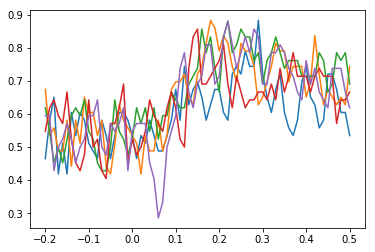

In [194]:
fig, ax = plt.subplots()
ax.plot(epochs.times, scores_time_decoding.T)
plt.show()

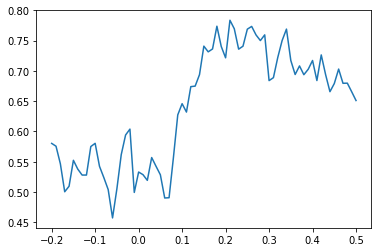

In [195]:
fig, ax = plt.subplots()
ax.plot(epochs.times, scores_time_decoding.mean(0))
plt.show()

In [196]:
from mne.decoding import GeneralizingEstimator
gen = GeneralizingEstimator(clf)
scores_gat = cross_val_multiscore(gen, X, y)

100%|██████████| Fitting GeneralizingEstimator : 71/71 [00:01<00:00,   37.50it/s]
100%|██████████| Scoring GeneralizingEstimator : 5041/5041 [00:02<00:00, 2497.52it/s]
100%|██████████| Fitting GeneralizingEstimator : 71/71 [00:02<00:00,   34.38it/s]
100%|██████████| Scoring GeneralizingEstimator : 5041/5041 [00:01<00:00, 2582.15it/s]
100%|██████████| Fitting GeneralizingEstimator : 71/71 [00:01<00:00,   35.58it/s]
100%|██████████| Scoring GeneralizingEstimator : 5041/5041 [00:01<00:00, 2531.10it/s]
100%|██████████| Fitting GeneralizingEstimator : 71/71 [00:01<00:00,   36.95it/s]
100%|██████████| Scoring GeneralizingEstimator : 5041/5041 [00:01<00:00, 2557.77it/s]
100%|██████████| Fitting GeneralizingEstimator : 71/71 [00:02<00:00,   34.17it/s]
100%|██████████| Scoring GeneralizingEstimator : 5041/5041 [00:02<00:00, 1863.00it/s]


In [198]:
scores_gat.shape

(5, 71, 71)

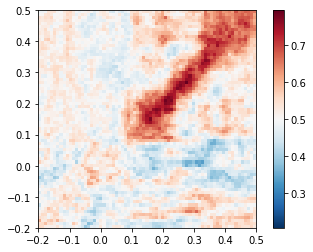

In [206]:
import numpy as np
data = scores_gat.mean(0)
vmax = np.abs(data).max()
tmin, tmax = epochs.times[[0, -1]]

fig, ax = plt.subplots()
im = ax.imshow(
    data,
    origin="lower", cmap="RdBu_r",
    extent=(tmin, tmax, tmin, tmax),
    vmax=vmax, vmin=1-vmax);

plt.colorbar(im)

In [199]:
from mne.decoding import UnsupervisedSpatialFilter
from sklearn.decomposition import PCA

In [200]:
pca = UnsupervisedSpatialFilter(PCA(.85))

In [202]:
pca_clf = make_pipeline(pca, Vectorizer(), StandardScaler(), LinearSVC())


In [203]:
cross_val_score(pca_clf, X, y)

array([0.65116279, 0.81395349, 0.76190476, 0.64285714, 0.57142857])

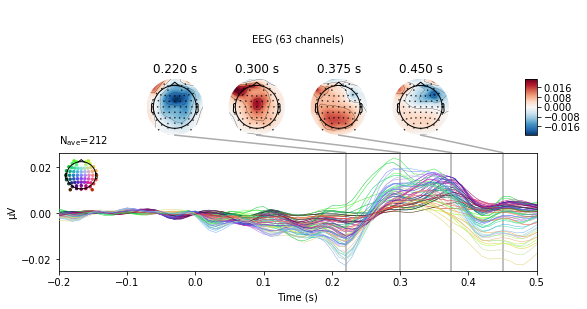

In [207]:
svc = LinearSVC(class_weight="balanced")
topos = np.array([svc.fit(time_point.T, y).coef_ * time_point.std(1)
                  for time_point in X.T])[:, 0, :]
topo_ev = mne.EvokedArray(topos.T, info=epochs.info, tmin=-.2, nave=len(y))
topo_ev.plot_joint(times=[.22, .3, .375, .45]);